# TELECOM CHURN ANALYSIS

**Problem statement:** In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry generally experiences high annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a telecom firm, and will generate insights on the influential factors leading to the churn of the customers. The dataset used in this project is from IBM Sample Data Sets, which is hosted on Kaggle. For more information, please refers to the Kaggle dataset description.

**Dataset Information:**
This sample Data Set contains customer data of a telecom company and it shows customers who left their service last month

**Importing the required libraries**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Loading the dataset**

In [3]:
telco_base_data = pd.read_csv(r"C:\Users\97156\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Looking at the top 5 records of data**

In [4]:
telco_base_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**CHECKING THE VARIOUS ATTRIBUTES OF THE DATA**

**Shape (No.of rows and No.of columns)**

In [5]:
telco_base_data.shape

(7043, 21)

**Column names**

In [6]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Familiarizing with the unique values on each columns**

In [7]:
for i in telco_base_data:
    print(i)
    print(telco_base_data[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

**Checking the data types of all the columns**

In [8]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**DATA CLEANING**

First of all, we can create a copy of the base data for manipulation and processing

In [13]:
telco_data = telco_base_data.copy()

From the above data about data types, we can see Total charges is in text format. So, we should convert it into numerical
values

In [14]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')

**CHECKING IF THERE ARE ANY MISSING VALUES IN THE DATASET**

In [10]:
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
telco_data ['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

 As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [17]:
telco_data[telco_data ['TotalCharges'].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

**Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

**Removing missing values**

In [18]:
telco_data.dropna(how = 'any', inplace = True)

In [19]:
telco_data.shape

(7032, 21)

**Now there is a total of 7032 rows in the data**

**Calculating the percentage of missing values**

D:\shezin\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


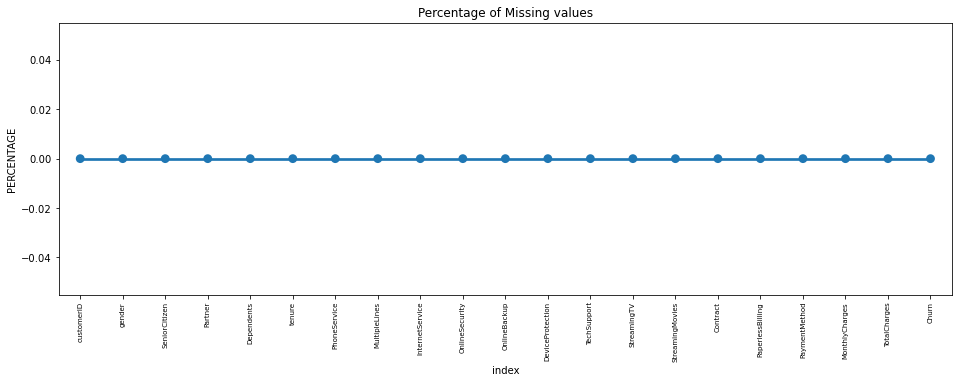

In [12]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**So, now we can ensure that we are not having any missing values in our data**

Customer ID seems not useful for our analysis, so we can remove them

In [20]:
telco_data.drop(columns= ['customerID'], axis=1, inplace=True)
telco_data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## Data Exploration


Checking the descriptive statistics of numerical variables

In [21]:
telco_base_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

SeniorCitizen is actually a categorical hence the 25%, 50%, 75% distribution is not proper

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

**Calculating the ratio between churned and non-churned customers**

Text(0.5, 1.02, 'Count of TARGET Variable per category')

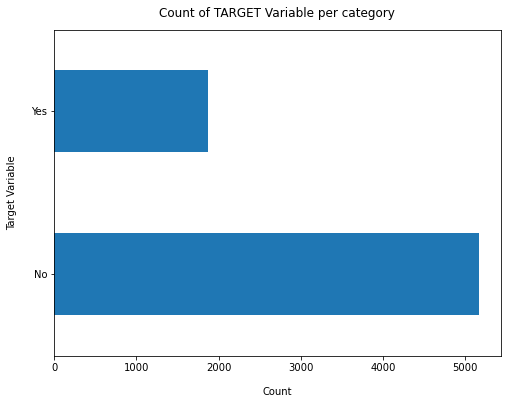

In [22]:
telco_base_data['Churn'].value_counts().plot(kind='barh',figsize=(8, 6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [23]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [63]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* Now, we will analyse the data with other features while taking the target values(Churn column) separately to get some insights, so that we can get insights on the factors influencing the churn of the customers

### Univariate Analysis


In [64]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'tenure','TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    fig = px.histogram(telco_data, x=predictor, color="Churn",barmode='group', title="<b>Customer churn distribution<b>")
    fig.update_layout(width=650, height=470, bargap=0.1)
    fig.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

**SUMMING UP INSIGHTS AFTER UNIVARIATE ANALYSIS**

1. Gender column is giving no insights. 
2. Senior citizens are more likely to churn but they are very much less in number compared to non-senior citizens. 
3. People with no partners are more likely to churn compared to people with partners.
4. People with no dependents are more likely to churn.
5. Having phone service or not is not a influencing factor on churn,but as a matter of knowledge people with no phone services    are very rare. 
6. People with multiple lines seems moderately likely to Churn. 
7. People with fibre optics has very high probability for churning. 
8. People with no online backup,security,device protection,tech support are more likely to churn. 
9. Streaming movies and tv has no influence on churn.
10. Month to month customers are high likely to churn. 
11. People with paperless billing seem to be more likely to churn. 
12. People who have made their payment through electronic check are high likely to churn.

Nextly,we can have a look at univariate analysis for numeric columns.

Relation between Monthly Charges and Total Charges

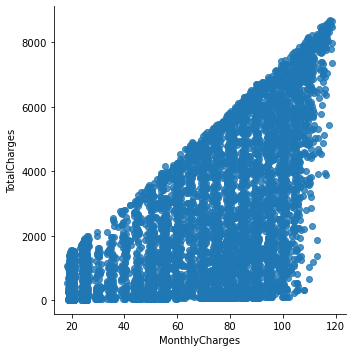

In [27]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

Monthly Charges vs Churn

 For the ease of our analysis let's Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [32]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [33]:
telco_data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

Text(0.5, 1.0, 'Monthly charges by churn')

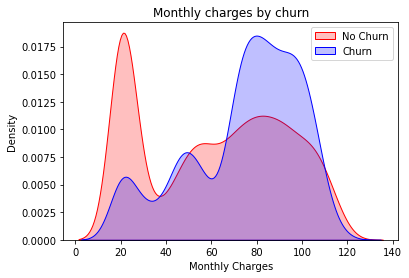

In [34]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges are high

Most churnes have monthly charges between USD 65 to 105

Total Charges vs Churn

Text(0.5, 1.0, 'Total charges vs churn')

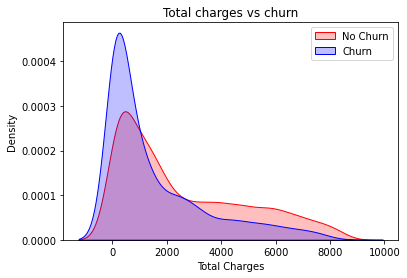

In [67]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges vs churn')

Tenure vs Churn

D:\shezin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\shezin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Tenure vs churn')

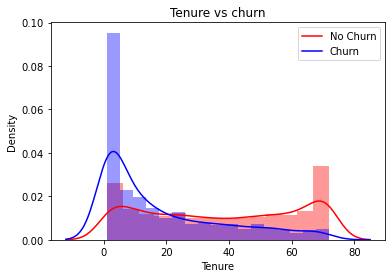

In [68]:
ten = sns.distplot(telco_data.tenure[(telco_data["Churn"] == 0) ],
                color="Red")
ten = sns.distplot(telco_data.tenure[(telco_data["Churn"] == 1) ],
                ax =ten, color="Blue")
ten.legend(["No Churn","Churn"],loc='upper right')
ten.set_ylabel('Density')
ten.set_xlabel('Tenure')
ten.set_title('Tenure vs churn')

Many of the customers who churned, churned so early mostly between 0 to 4 months.

If we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linked to **High Churn**.

 Now, we can convert all the features into numerical and calculate the correlation between them to find out which feature/column  which are high or very less likely to churn in comparison between them.

Converting all the categorical variables into dummy variables

In [40]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

In [41]:
telco_data_dummies

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0                 0       1           29.85         29.85      0   
1                 0      34           56.95       1889.50      0   
2                 0       2           53.85        108.15      1   
3                 0      45           42.30       1840.75      0   
4                 0       2           70.70        151.65      1   
...             ...     ...             ...           ...    ...   
7038              0      24           84.80       1990.50      0   
7039              0      72          103.20       7362.90      0   
7040              0      11           29.60        346.45      0   
7041              1       4           74.40        306.60      1   
7042              0      66          105.65       6844.50      0   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0                 1            0           0            1              1  ...   
1                 0            1           1            0              1  ...   
2                 0            1           1            0              1  ...   
3                 0            1           1            0              1  ...   
4                 1            0           1            0              1  ...   
...             ...          ...         ...          ...            ...  ...   
7038              0            1           0            1              0  ...   
7039              1            0           0            1              0  ...   
7040              1            0           0            1              0  ...   
7041              0            1           0            1              1  ...   
7042              0            1           1            0              1  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                       0                        1                  0   
1                       0                        0                  1   
2                       0                        1                  0   
3                       0                        0                  1   
4                       0                        1                  0   
...                   ...                      ...                ...   
7038                    1                        0                  1   
7039                    1                        0                  1   
7040                    0                        1                  0   
7041                    0                        1                  0   
7042                    1                        0                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     0                    0                     1   
1                     0                    1                     0   
2                     0                    0                     1   
3                     0                    1                     0   
4                     0                    0                     1   
...                 ...                  ...                   ...   
7038                  0                    0                     1   
7039                  0                    0                     1   
7040                  0                    0                     1   
7041                  0                    0                     1   
7042                  1                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041    

In [42]:
telco_data_dummies.corr()

SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.015683   
tenure                                        0.015683  1.000000   
MonthlyCharges                                0.219874  0.246862   
TotalCharges                                  0.102411  0.825880   
Churn                                         0.150541 -0.354049   
gender_Female                                 0.001819 -0.005285   
gender_Male                                  -0.001819  0.005285   
Partner_No                                   -0.016957 -0.381912   
Partner_Yes                                   0.016957  0.381912   
Dependents_No                                 0.210550 -0.163386   
Dependents_Yes                               -0.210550  0.163386   
PhoneService_No                              -0.008392 -0.007877   
PhoneService_Yes                              0.008392  0.007877   
MultipleLines_No                             -0.136377 -0.323891   
MultipleLines_No phone service               -0.008392 -0.007877   
MultipleLines_Yes                             0.142996  0.332399   
InternetService_DSL                          -0.108276  0.013786   
InternetService_Fiber optic                   0.254923  0.017930   
InternetService_No                           -0.182519 -0.037529   
OnlineSecurity_No                             0.185145 -0.265987   
OnlineSecurity_No internet service           -0.182519 -0.037529   
OnlineSecurity_Yes                           -0.038576  0.328297   
OnlineBackup_No                               0.087539 -0.314769   
OnlineBackup_No internet service             -0.182519 -0.037529   
OnlineBackup_Yes                              0.066663  0.361138   
DeviceProtection_No                           0.094403 -0.314820   
DeviceProtection_No internet service         -0.182519 -0.037529   
DeviceProtection_Yes                          0.059514  0.361520   
TechSupport_No                                0.205254 -0.264363   
TechSupport_No internet service              -0.182519 -0.037529   
TechSupport_Yes                              -0.060577  0.325288   
StreamingTV_No                                0.048664 -0.246814   
StreamingTV_No internet service              -0.182519 -0.037529   
StreamingTV_Yes                               0.105445  0.280264   
StreamingMovies_No                            0.034196 -0.252890   
StreamingMovies_No internet service          -0.182519 -0.037529   
StreamingMovies_Yes                           0.119842  0.285402   
Contract_Month-to-month                       0.137752 -0.649346   
Contract_One year                            -0.046491  0.202338   
Contract_Two year                            -0.116205  0.563801   
PaperlessBilling_No                          -0.156258 -0.004823   
PaperlessBilling_Yes                          0.156258  0.004823   
PaymentMethod_Bank transfer (automatic)      -0.016235  0.243822   
PaymentMethod_Credit card (automatic)        -0.024359  0.232800   
PaymentMethod_Electronic check                0.171322 -0.210197   
PaymentMethod_Mailed check                   -0.152987 -0.232181   

                                         MonthlyCharges  TotalCharges  \
SeniorCitizen                                  0.219874      0.102411   
tenure                                         0.246862      0.825880   
MonthlyCharges                                 1.000000      0.651065   
TotalCharges                                   0.651065      1.000000   
Churn                                          0.192858     -0.199484   
gender_Female                                  0.013779     -0.000048   
gender_Male                                   -0.013779      0.000048   
Partner_No                                    -0.097825     -0.319072   
Partner_Yes                                    0.097825      0.319072   
Dependents_No                                  0.112343     -0.064653   
Dependents_Yes                           

In [43]:
telco_data_dummies.corr()['Churn']

SeniorCitizen                              0.150541
tenure                                    -0.354049
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecuri

<AxesSubplot:>

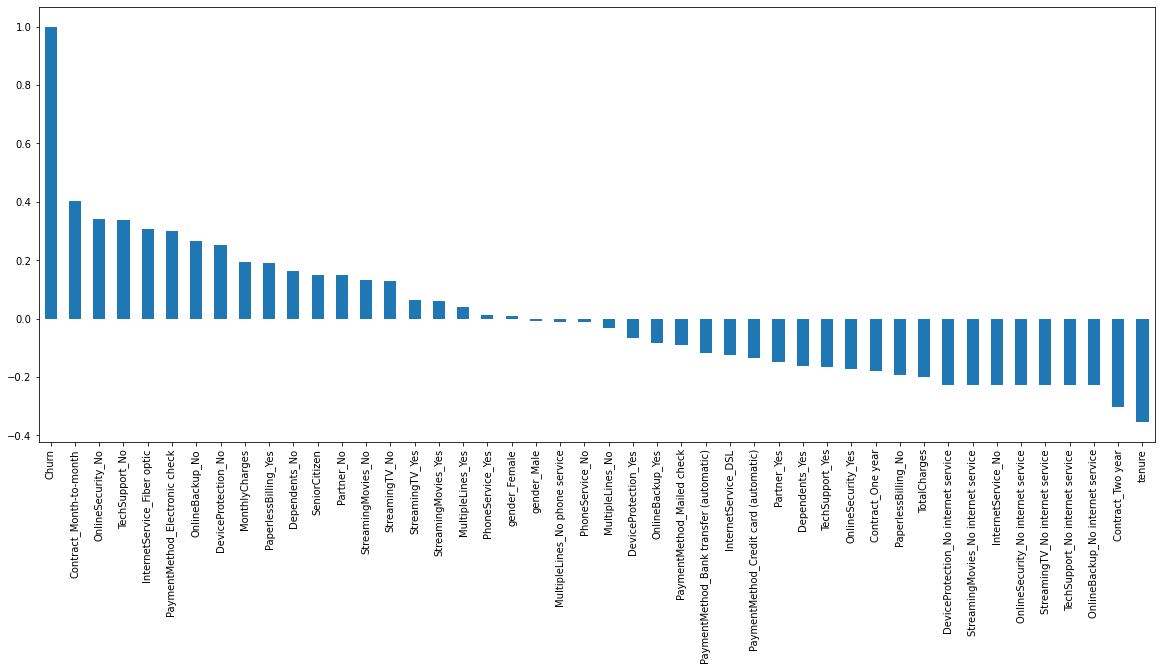

In [44]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

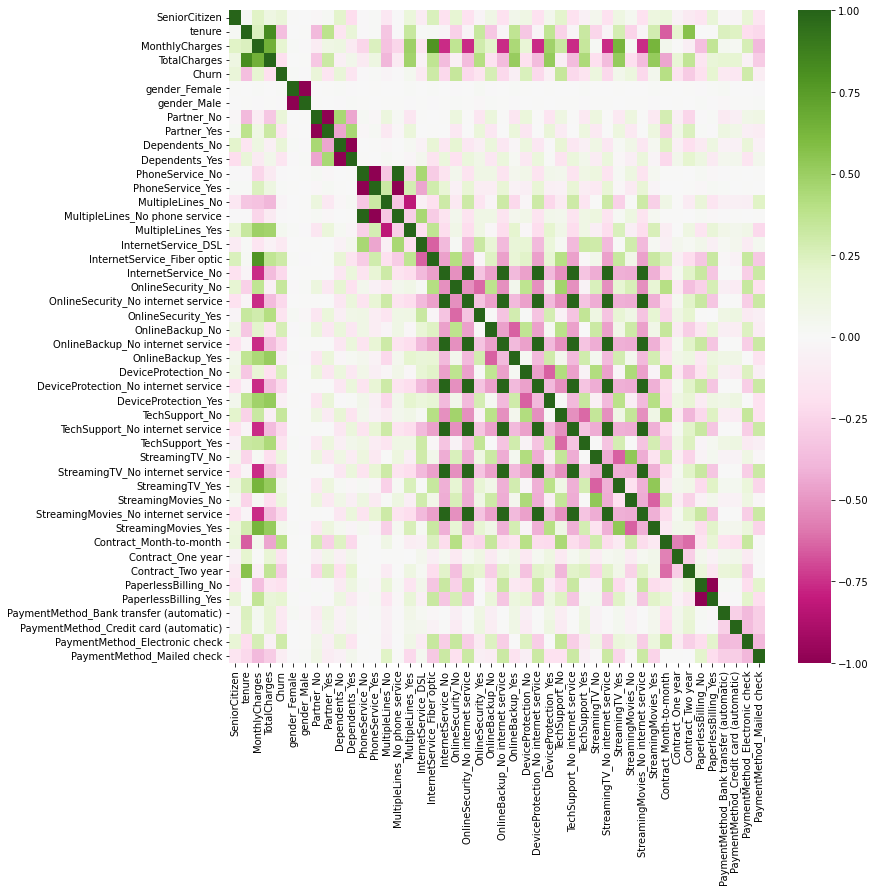

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="PiYG")

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap**

Most churners have monthly charges between 60-105 USD, and most churners are churning before completing 4 months of their Tenure

We have done univariate analysis of both categorical and numerical variables,along with finding the correlation between all of them, and against churn. Now we can pause and organize insights and try to derive a story or ask ourselves some questions so that it will help us to decide on which features/columns which are mainly to be focused on while conducting bivariate analysis and more multivariate analysis. Accordingly we can investigate on more stories and finally reach into a conclusion

### Bivariate Analysis

Before, moving ahead into bivariate analysis, Its good practice to create a function for both bivariate and multi variate analysis, so that we can use them wherever needed

In [48]:
#creating functions for bivariate analysis, very useful.
def bivariate_analysis(cat_var1, cat_var2,target_var=telco_data.Churn):
    fig,ax = plt.subplots(1,1,figsize=(18,5))
    font_size = 15
    cat_grouped_by_cat_targt = pd.crosstab(index = [cat_var1, cat_var2],
                                        columns = target_var, normalize = "index")*100 
    cat_grouped_by_cat_targt.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var1.name}, {cat_var2.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

In [49]:
#creating functions for multivariate analysis, very useful.
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=telco_data.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

In [50]:
#creating functions for tetra multivariate analysis, very useful.
def tetra_multivariate_analysis(cat_var_1, cat_var_2, cat_var_3,cat_var_4, target_variable=telco_data.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3,cat_var_4],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name},{cat_var_4.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

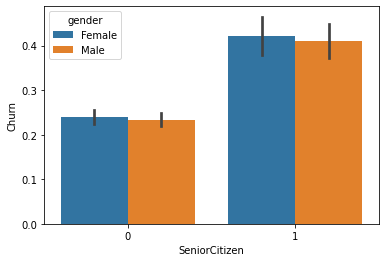

In [51]:
sns.barplot(x='SeniorCitizen',y='Churn',hue='gender',data=telco_data)

No much insights from Senior Citizen vs Gender with respect to Churn

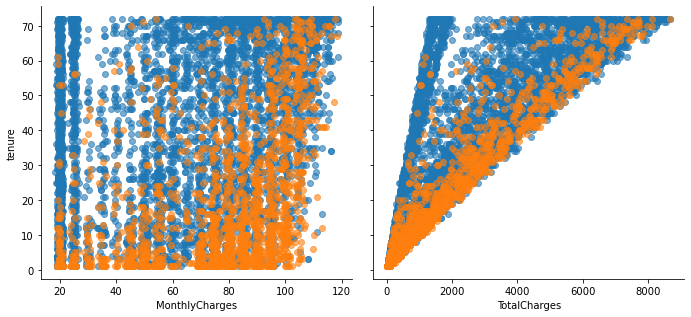

In [47]:
g = sns.PairGrid(telco_data, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

This graphs affirms something already evident. i.e, People with less tenure are churning more probably becuase of high monthly charges for them.

Next we can focus mainly on factors like fibre optics, electronic check, additional services like online security, online bacup, device protection, tech support etc. which showed a good correlation with churn rate during the univariate analysis. So, our bivariate and multi variate analysis will be mainly surrounding these factors

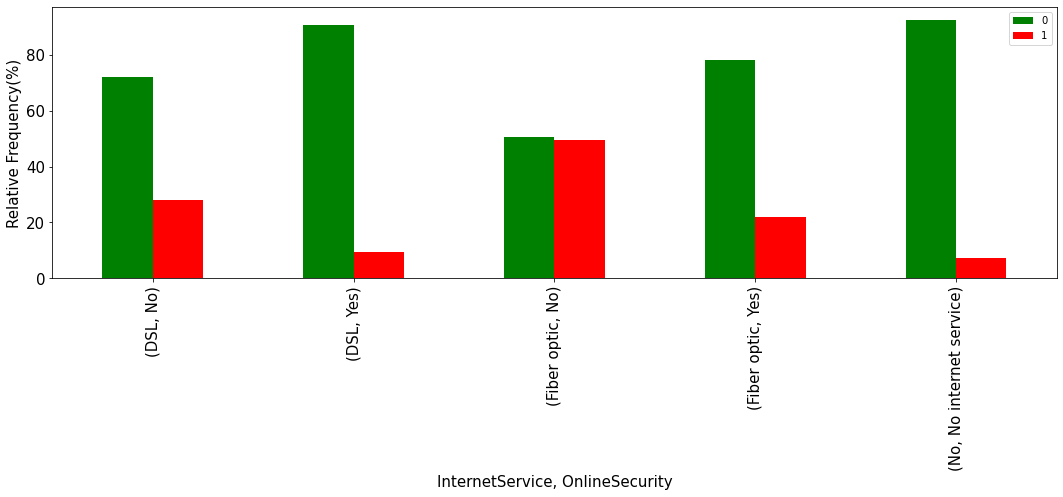

In [52]:
bivariate_analysis(telco_data.InternetService,telco_data.OnlineSecurity)

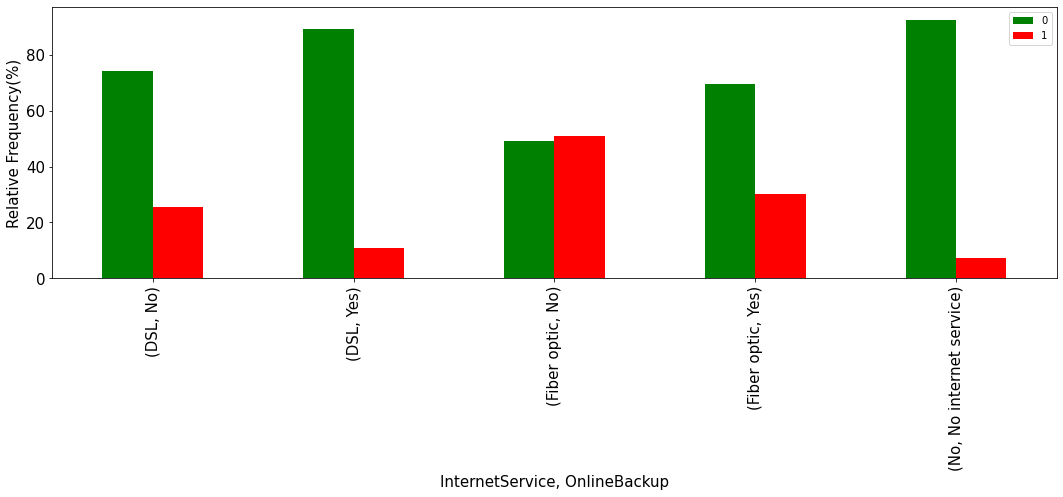

In [53]:
bivariate_analysis(telco_data.InternetService,telco_data.OnlineBackup)

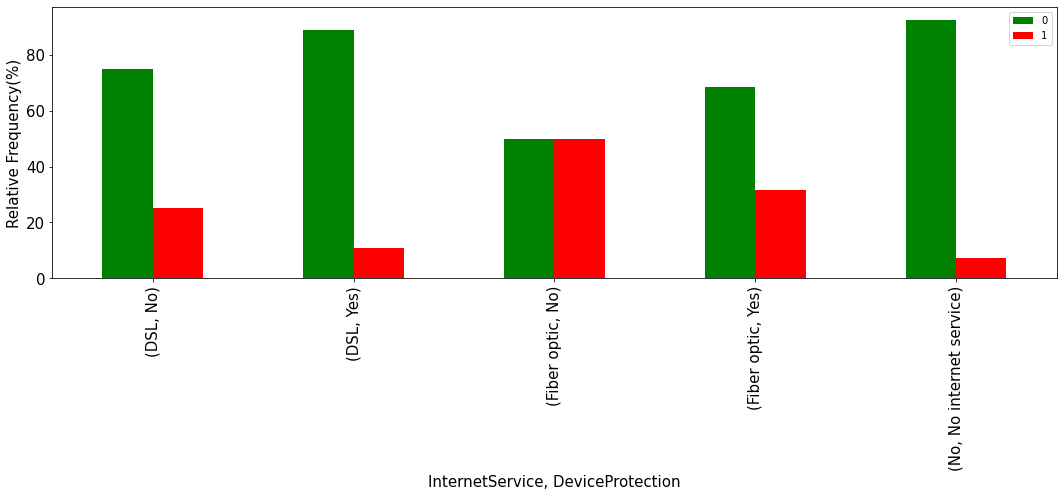

In [54]:
bivariate_analysis(telco_data.InternetService,telco_data.DeviceProtection)

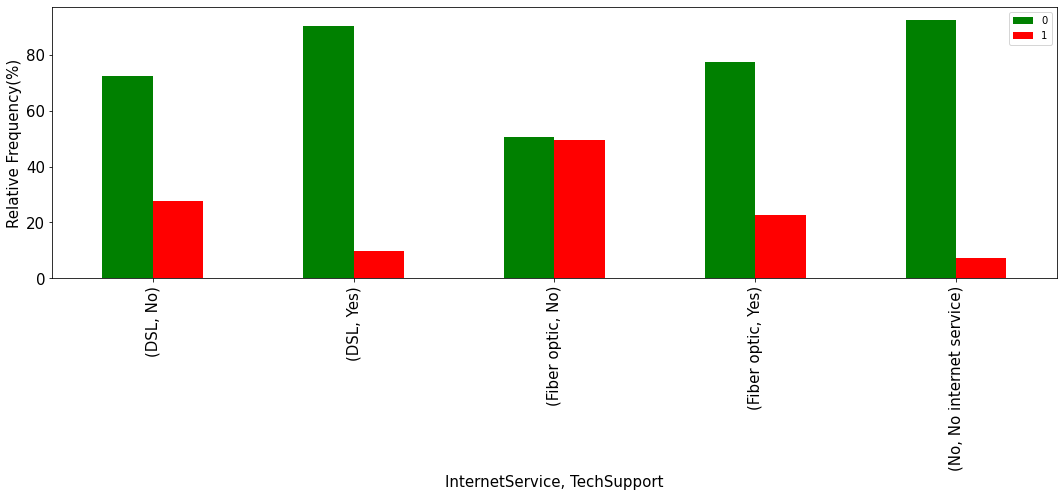

In [55]:
bivariate_analysis(telco_data.InternetService,telco_data.TechSupport)

These above visualizations are indicating high churn rate among the fibre optics customers who dont opt for additional services.

Now lets analyze fibre optics and payment method together

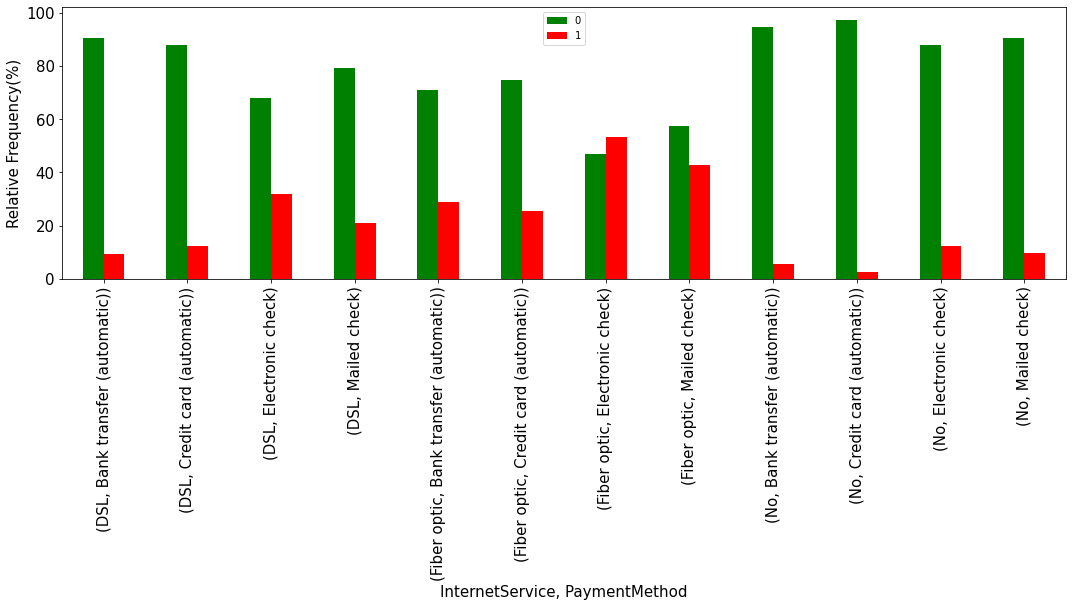

In [56]:
bivariate_analysis(telco_data.InternetService, telco_data.PaymentMethod)

Its clear that the churn rate is most for fibre optics customers who paid through electronic check

Now lets add **Additional services** column into this analysis

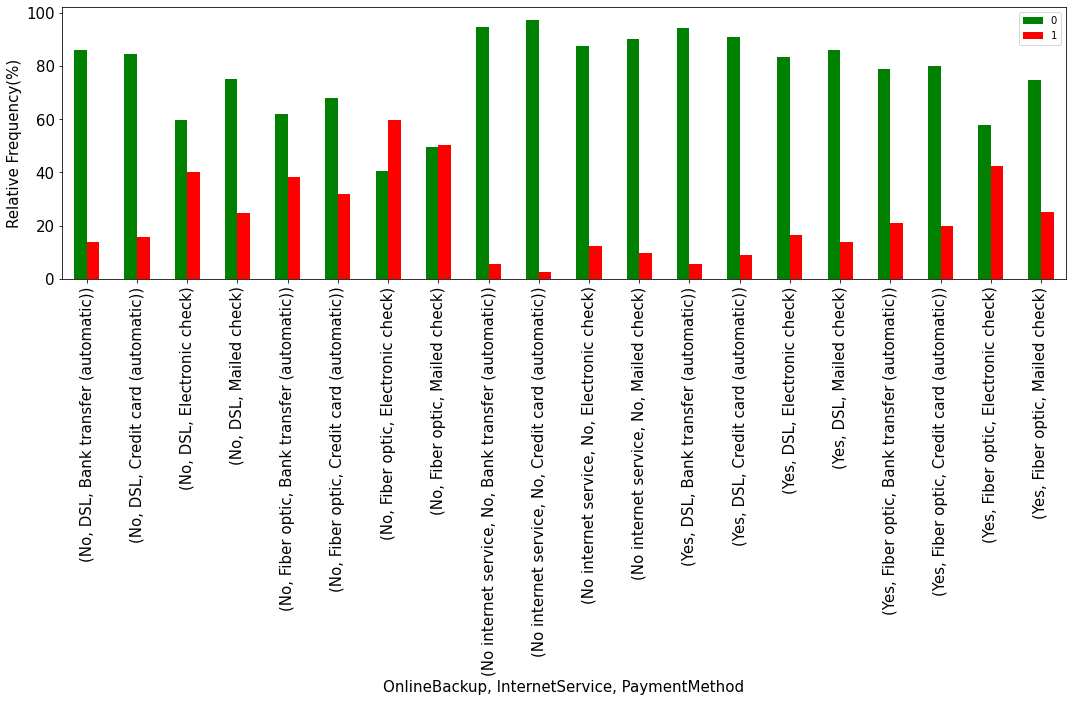

In [58]:
multivariate_analysis(telco_data.OnlineBackup, telco_data.InternetService, telco_data.PaymentMethod)

After this analysis we can fairly conclude that fibre optic customers, who haven't opted for additional services and paid through electronic biilling is a critical combination

**KEY INSIGHTS AND RECOMMENDATIONS**

We know fibreoptics have more churn rate than dsl, What may be the reason?

When analysed properly, people who dont opt additional services for fibre optics are highly likely to churn almost 50% in all cases(i.e. with the absence of each additional services).
So from this investigation we can conclude that telco_company is mainly loosing fibre optics customers who don't opt for additional services. Also, when analysing churning customers with no additional services against those opted for additional services, and with respect to both DSL and fibre optics, It is visible that Fibre optics customers who dont have additional services are more likely to churn than DSL customers who dont have additional services. This is may be pointing to the fact that people are really not interested to continue the service, when they realize that, the benefit of fibre optics is more helpful only if they opt for additional services. But as the fibre optics plan is already having high charge, choosing additional services will further increase against their budget. So, company should take a feedback from these customers and try to retain them by considering their price concerns for additional services.

And from the analysis on tenure and monthly charges, It can be concluded that most of these churners are customer with less tenure leaving the service probably because of the high monthly charges.

Also, there is a high churn rate associated with customers whose payment is done through electronic billing. The reason for that pattern is yet to be investiagted.

